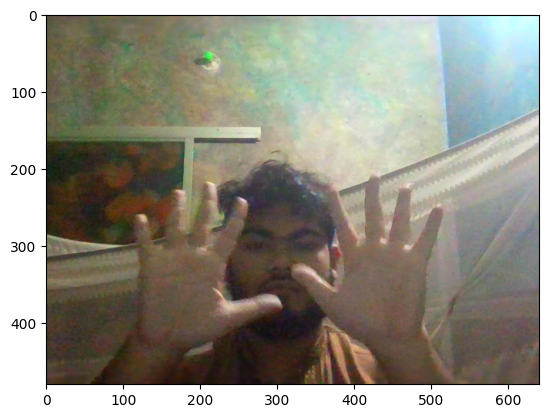

In [35]:
import matplotlib.pyplot as plt
import cv2

cap = cv2.VideoCapture(0)

success,img = cap.read()
cap.release()

img_flip = cv2.flip(img, 1)
img_rgb = cv2.cvtColor(img_flip, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

In [ ]:
import mediapipe as mp

mp_hands = mp.solutions.hands
    # shortcut for hands module
    # provides everything needed for hand detection and landmark tracking

hand_model = mp_hands.Hands(
    # creating Hands object  
    # loads hand detection + hand landmark model

    static_image_mode=False,
    max_num_hands=2,
    model_complexity=1,
        # (0-2), higher, accurate, slower
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)

mp_draw = mp.solutions.drawing_utils
    # loads drawing utilies module

results = hand_model.process(img_rgb)
    # returns a Results object containing:
        # results.multi_hand_landmarks
            # list of 21 landmarks per hand
        # results.multi_handedness 
            # left/right hand classification
        # results.multi_hand_world_landmarks 
            # optional 3D landmarks

e:\projects\hand_track_num_detect\venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [44]:
results.multi_hand_landmarks
    # returns a list of hands
    # results[0] = 1st detected hand landmarks

hand1_lms = results.multi_hand_landmarks[0]
    # contains object like thing containing 21 landmarks for hand1

hand1_lms_iterable = hand1_lms.landmark
    # returns the landmark points of 1st hand 
    # in a list like iterable object of length 21
"""
[x: 0.255960435
y: 0.873713732
z: 5.01125e-007,
x: 0.315093398
y: 0.866291165
z: -0.02837063,
...
x: 0.19124566
y: 0.5568434
z: -0.0475808047
]
"""

hand1_lms_iterable[0].x
    # 0.2559604346752167
hand1_lms_iterable[0].y
    # 0.8737137317657471
hand1_lms_iterable[0].z
    # 5.011249868402956e-07

5.011249868402956e-07

In [46]:
for hand_lms in results.multi_hand_landmarks:
    print(f'new hand')
    for id, lm in enumerate(hand_lms.landmark):
        # lm.x → normalized x coordinate (0..1)
        # lm.y → normalized y coordinate (0..1)
        # lm.z → depth-like value, relative to wrist
        print(id)
        print(lm.x)
        print(lm.y)
        print(lm.z)

hand
0
0.2559604346752167
0.8737137317657471
5.011249868402956e-07
1
0.31509339809417725
0.8662911653518677
-0.028370629996061325
2
0.372467577457428
0.8248376846313477
-0.0387345626950264
3
0.41937482357025146
0.7972878813743591
-0.047798026353120804
4
0.4589100480079651
0.7882938981056213
-0.05672536417841911
5
0.3412010371685028
0.6770575642585754
-0.016436124220490456
6
0.37085825204849243
0.6025419235229492
-0.027814626693725586
7
0.38667649030685425
0.5573767423629761
-0.03975481539964676
8
0.3971123695373535
0.5162205100059509
-0.04974524676799774
9
0.30187880992889404
0.6556711196899414
-0.015949124470353127
10
0.3187292814254761
0.5690529942512512
-0.023874055594205856
11
0.32800057530403137
0.5162755250930786
-0.03542690724134445
12
0.3323940336704254
0.4733238220214844
-0.044886264950037
13
0.261386901140213
0.6580415368080139
-0.01924595981836319
14
0.2622147500514984
0.5780865550041199
-0.02858751080930233
15
0.263755738735199
0.5333331227302551
-0.040341343730688095
16
0.

In [20]:
h,w,c = img.shape
pixel_x = int(lm.x*w)
pixel_y = int(lm.y*h)

print(pixel_x)
print(pixel_y)

498
264


In [53]:
mp_hands.HAND_CONNECTIONS
    # connections to made between id pairs

frozenset({(0, 1),
           (0, 5),
           (0, 17),
           (1, 2),
           (2, 3),
           (3, 4),
           (5, 6),
           (5, 9),
           (6, 7),
           (7, 8),
           (9, 10),
           (9, 13),
           (10, 11),
           (11, 12),
           (13, 14),
           (13, 17),
           (14, 15),
           (15, 16),
           (17, 18),
           (18, 19),
           (19, 20)})

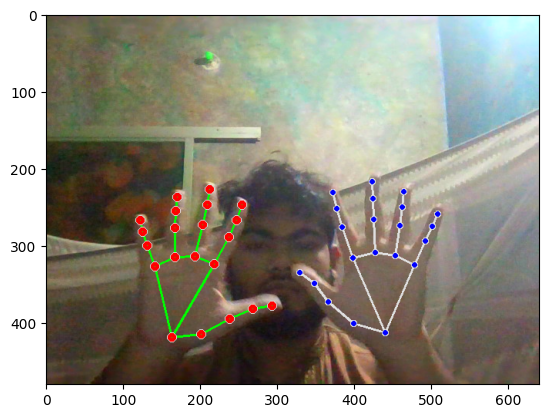

In [52]:
hand1_lms = results.multi_hand_landmarks[0]
hand2_lms = results.multi_hand_landmarks[1]

mp_draw.draw_landmarks(img_rgb, 
                       hand1_lms, 
                       mp_hands.HAND_CONNECTIONS,
                       mp_draw.DrawingSpec(color=(255,0,0), thickness=4, circle_radius=3),
                       mp_draw.DrawingSpec(color=(0,255,0), thickness=2)
                    )
mp_draw.draw_landmarks(img_rgb, hand2_lms, mp_hands.HAND_CONNECTIONS)

plt.imshow(img_rgb)


In [ ]:
# entire process of landmark showing on hands in live

import cv2
import mediapipe as mp

cap = cv2.VideoCapture(0)

mp_hands = mp.solutions.hands
mp_draw = mp.solutions.drawing_utils

hand_model = mp_hands.Hands(
    static_image_mode = False,
    max_num_hands = 1,
    model_complexity = 0,
    min_detection_confidence = 0.5,
    min_tracking_confidence = 0.5
)

while cap.isOpened():

    success, img = cap.read()

    img = cv2.flip(img, 1)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # OpenCV loads BGR, Mediapipe expects RGB

    results = hand_model.process(img_rgb)

    if results.multi_hand_landmarks:
        for hand_lms in results.multi_hand_landmarks:
            mp_draw.draw_landmarks(
                img,
                hand_lms,
                mp_hands.HAND_CONNECTIONS,
                mp_draw.DrawingSpec(
                    color=(255,0,0),
                    thickness=4,
                    circle_radius=3
                ),
                mp_draw.DrawingSpec(
                    color=(0,255,0),
                    thickness=4
                )
            )
    cv2.imshow("frame",img)
    
    if cv2.waitKey(int(5)) == 27:
        break

cap.release()
cv2.destroyAllWindows()

In [ ]:
import cv2
import mediapipe as mp

# 1. Setup
mp_hands = mp.solutions.hands
mp_draw = mp.solutions.drawing_utils
hands = mp_hands.Hands(max_num_hands=2)

cap = cv2.VideoCapture(0)           # webcam input

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame = cv2.flip(frame,1)

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        # OpenCV loads BGR, Mediapipe expects RGB

    results = hands.process(frame_rgb)
        # detect hands and landmarks

    if results.multi_hand_landmarks:
        for handLms in results.multi_hand_landmarks:
            mp_draw.draw_landmarks(
                frame, handLms, mp_hands.HAND_CONNECTIONS
            )

    cv2.imshow("Hand Tracking", frame)
    if cv2.waitKey(1) == 27:
        break

cap.release()
cv2.destroyAllWindows()
